<a href="https://colab.research.google.com/github/rxhith/Deep-Learning-Lab/blob/main/Experiment%2010-%20ANN%20Image%20Classification/Exp_10_ANN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.4889 - accuracy: 0.8243 - val_loss: 0.3793 - val_accuracy: 0.8654
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3646 - accuracy: 0.8659 - val_loss: 0.3583 - val_accuracy: 0.8694
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3281 - accuracy: 0.8784 - val_loss: 0.3275 - val_accuracy: 0.8792
Epoch 4/10
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3039 - accuracy: 0.8867 - val_loss: 0.3050 - val_accuracy: 0.8866
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2843 - accuracy: 0.8939 - val_loss: 0.2990 - val_accuracy: 0.8886
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2714 - accuracy: 0.8969 - val_loss: 0.3112 - val_accuracy: 0.8878
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2608 - accuracy: 0.9022 - val_loss: 0.3375 - val_a

1/1 [==============================] - 0s 21ms/step


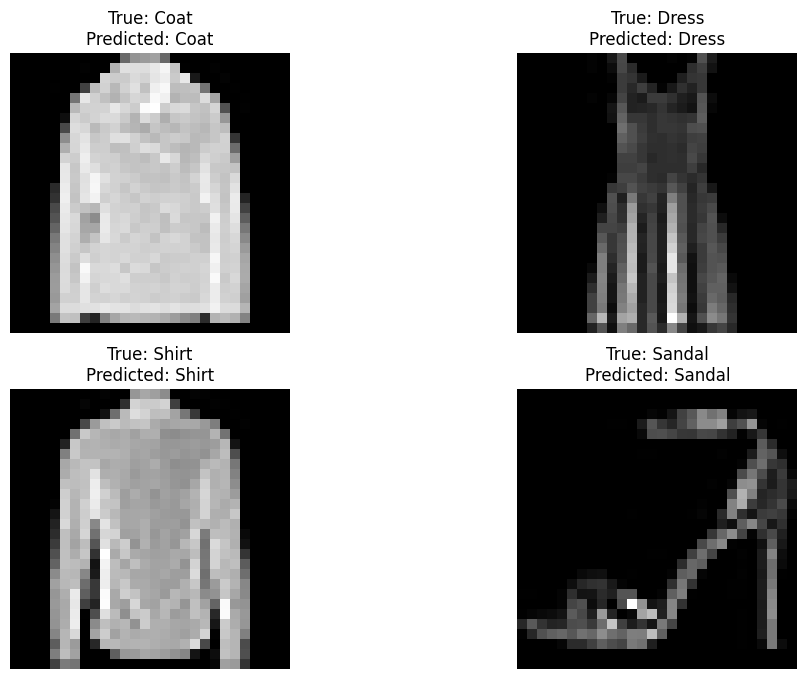

In [7]:
import numpy as np
random_indices = np.random.choice(X_test.shape[0], 4, replace=False)
# Create a subplot to display the images and labels
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
  plt.subplot(2, 2, i + 1)
  plt.imshow(X_test[idx], cmap='gray')
  plt.axis('off')
  true_label = class_names[y_test[idx]]
  # Make predictions for the selected image
  prediction = model.predict(X_test[idx:idx+1])
  predicted_label = class_names[np.argmax(prediction)]
  plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
plt.show()